## PyTorch Essentials: Module 2
**Key Concepts:**  
- `nn.Module` lifecycle  
- Common layers (Linear, Conv2d, Dropout)  
- Loss functions & optimizers  

**Hands-On:**  
- MNIST classifier with Sequential API  
- Custom module architecture 

### Building and Training a Simple Model in PyTorch
Understand the overall workflow involved

##### y = mx + b --> y = weight * X + bias (wX + b)

In [2]:
import torch
torch.__version__

'2.8.0'

In [11]:
a = torch.arange(10)
print(a, a.shape)
a.reshape(-1, 1)
a.unsqueeze(1)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) torch.Size([10])


tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])

In [74]:
weight = 0.6
bias = 0.4

X = torch.arange(0, 100, 0.1).unsqueeze(dim=1)
print(X.shape)
print(X[:10])

y = weight * X + bias
print(y[:10])

torch.Size([1000, 1])
tensor([[0.0000],
        [0.1000],
        [0.2000],
        [0.3000],
        [0.4000],
        [0.5000],
        [0.6000],
        [0.7000],
        [0.8000],
        [0.9000]])
tensor([[0.4000],
        [0.4600],
        [0.5200],
        [0.5800],
        [0.6400],
        [0.7000],
        [0.7600],
        [0.8200],
        [0.8800],
        [0.9400]])


In [63]:
train_split = int(0.8 * len(X))
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]
print(len(X_train), len(X_test))

test_eval_split = int(0.5 * len(X_test))
X_test, X_eval = X_test[:test_eval_split], X_test[test_eval_split:]
y_test, y_eval = y_test[:test_eval_split], y_test[test_eval_split:]

print(len(y_train), len(y_test), len(y_eval))
print(X_train[:5], y_train[:5], X_test[:5], y_test[:5], X_eval[:5], y_eval[:5])

8000 2000
8000 1000 1000
tensor([[0.0000],
        [0.1000],
        [0.2000],
        [0.3000],
        [0.4000]]) tensor([[0.4000],
        [0.4600],
        [0.5200],
        [0.5800],
        [0.6400]]) tensor([[800.0000],
        [800.1000],
        [800.2000],
        [800.3000],
        [800.4000]]) tensor([[480.4000],
        [480.4600],
        [480.5200],
        [480.5800],
        [480.6400]]) tensor([[900.0000],
        [900.1000],
        [900.2000],
        [900.3000],
        [900.4000]]) tensor([[540.4000],
        [540.4600],
        [540.5201],
        [540.5800],
        [540.6401]])


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_test, X_eval = X_test[:len(X_test)//2], X_test[len(X_test)//2:]
y_test, y_eval = y_test[:len(y_test)//2], y_test[len(y_test)//2:]

print(len(X_train), len(X_test), len(X_eval))
print(len(y_train), len(y_test), len(y_eval))

print(X_train[:5], y_train[:5], X_test[:5], y_test[:5], X_eval[:5], y_eval[:5])

800 100 100
800 100 100
tensor([[57.7000],
        [68.8000],
        [28.9000],
        [ 1.7000],
        [70.2000]]) tensor([[35.0200],
        [41.6800],
        [17.7400],
        [ 1.4200],
        [42.5200]]) tensor([[37.0000],
        [68.9000],
        [87.3000],
        [81.6000],
        [39.4000]]) tensor([[22.6000],
        [41.7400],
        [52.7800],
        [49.3600],
        [24.0400]]) tensor([[25.6000],
        [29.8000],
        [61.8000],
        [43.0000],
        [93.5000]]) tensor([[15.7600],
        [18.2800],
        [37.4800],
        [26.2000],
        [56.5000]])


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline


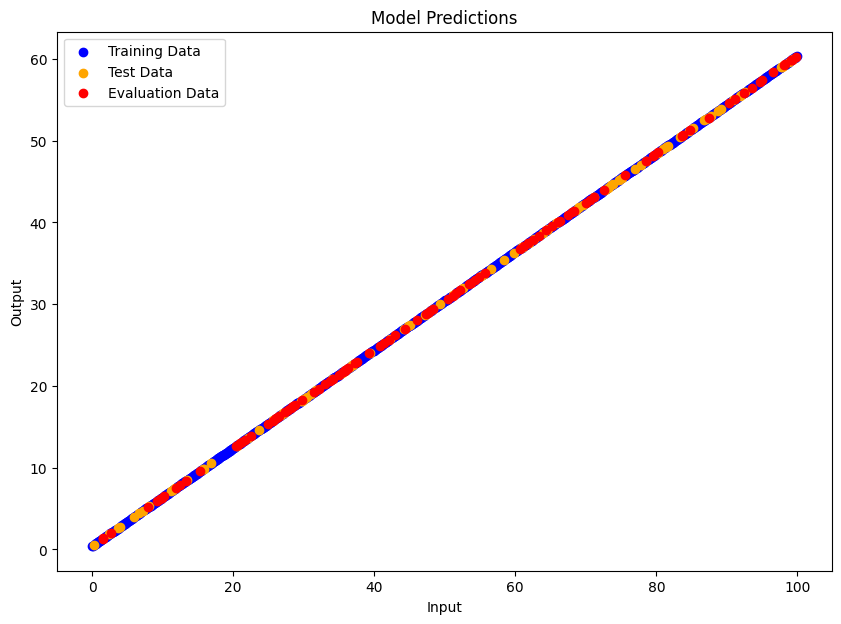

In [90]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     eval_data=X_eval,
                     eval_labels=y_eval,
                     predictions=None):
    
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, color="blue", label="Training Data")
    plt.scatter(test_data, test_labels, color="orange", label="Test Data")
    plt.scatter(eval_data, eval_labels, color="red", label="Evaluation Data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, color="green", label="Predictions")

    plt.legend()
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.title("Model Predictions")
    plt.show()

plot_predictions(X_train, y_train, X_test, y_test)
plt.show()

In [27]:
# 1. Initialize the random seed in PyTorch

torch.manual_seed(42)

In [28]:
torch.randn(1)

tensor([0.3367])

In [93]:
import torch
import torch.nn as nn
import torch.optim as optim

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias
    

In [94]:
model = LinearRegressionModel()
model

LinearRegressionModel()

In [95]:
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [96]:
with torch.inference_mode():
    y_pred = model(X_test)

y_pred[:5], y_test[:5]

(tensor([[12.5864],
         [23.3268],
         [29.5219],
         [27.6027],
         [13.3944]]),
 tensor([[22.6000],
         [41.7400],
         [52.7800],
         [49.3600],
         [24.0400]]))

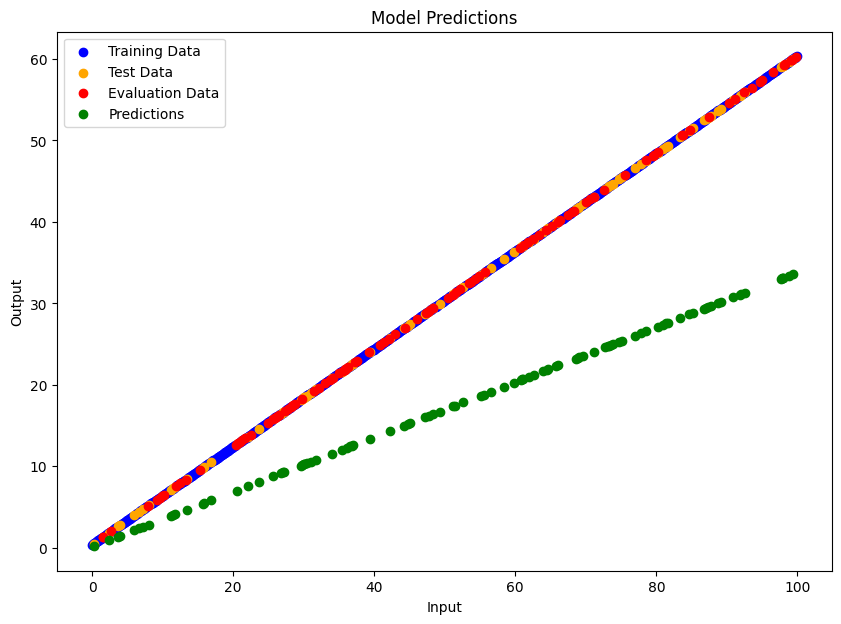

In [97]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=y_pred)
plt.show()

In [36]:
list(model.parameters())

[Parameter containing:
 tensor([0.1288], requires_grad=True),
 Parameter containing:
 tensor([0.2345], requires_grad=True)]

In [37]:
loss_fn = nn.L1Loss() # Mean Absolute Error

optimizer = optim.SGD(model.parameters(), lr=0.01)


In [80]:
import torch
import torch.nn as nn
import torch.optim as optim

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias
    

In [111]:
# Setting up the training loop

# 1. Initialize random seed
torch.manual_seed(42)

# 2. Initialize model, loss function, and optimizer
model = LinearRegressionModel()
loss_fn = nn.L1Loss()  # Mean Absolute Error
#optimizer = optim.SGD(model.parameters(), lr=0.001)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Using Adam optimizer for better convergence

# 3. Set number of epochs
epochs = 50000

train_losses = []
test_losses = []
epoch_count = []

# 4. Training loop
for epoch in range(epochs):

    # a. Initialize the training
    model.train()

    # b. Forward pass (training)
    y_pred = model(X_train)

    # c. Compute losses
    loss = loss_fn(y_pred, y_train)

    # d. Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()  # Set model to evaluation mode

    # e. Validation
    with torch.inference_mode():
        test_pred = model(X_eval)
        test_loss = loss_fn(test_pred, y_eval)

        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")
            train_losses.append(loss.detach().numpy())
            test_losses.append(test_loss.detach().numpy())
            epoch_count.append(epoch)


Epoch: 0 | Train Loss: 13.32562 | Test Loss: 13.15484
Epoch: 10 | Train Loss: 12.81985 | Test Loss: 12.65365
Epoch: 20 | Train Loss: 12.31407 | Test Loss: 12.15245
Epoch: 30 | Train Loss: 11.80829 | Test Loss: 11.65126
Epoch: 40 | Train Loss: 11.30252 | Test Loss: 11.15007
Epoch: 50 | Train Loss: 10.79674 | Test Loss: 10.64887
Epoch: 60 | Train Loss: 10.29097 | Test Loss: 10.14768
Epoch: 70 | Train Loss: 9.78519 | Test Loss: 9.64649
Epoch: 80 | Train Loss: 9.27941 | Test Loss: 9.14529
Epoch: 90 | Train Loss: 8.77364 | Test Loss: 8.64410
Epoch: 100 | Train Loss: 8.26786 | Test Loss: 8.14291
Epoch: 110 | Train Loss: 7.76208 | Test Loss: 7.64171
Epoch: 120 | Train Loss: 7.25631 | Test Loss: 7.14052
Epoch: 130 | Train Loss: 6.75053 | Test Loss: 6.63932
Epoch: 140 | Train Loss: 6.24476 | Test Loss: 6.13813
Epoch: 150 | Train Loss: 5.73898 | Test Loss: 5.63694
Epoch: 160 | Train Loss: 5.23321 | Test Loss: 5.13574
Epoch: 170 | Train Loss: 4.72743 | Test Loss: 4.63455
Epoch: 180 | Train Loss: 

In [112]:
model.state_dict()

OrderedDict([('weight', tensor([0.6000])), ('bias', tensor([0.4000]))])

In [100]:
model.state_dict()

OrderedDict([('weight', tensor([0.6050])), ('bias', tensor([0.4000]))])

Epoch: 0 | MAE Train Loss: 18.29238510131836 | MAE Test Loss: 19.552175521850586 
Epoch: 10 | MAE Train Loss: 15.833382606506348 | MAE Test Loss: 16.886146545410156 
Epoch: 20 | MAE Train Loss: 13.374380111694336 | MAE Test Loss: 14.220118522644043 
Epoch: 30 | MAE Train Loss: 10.915375709533691 | MAE Test Loss: 11.554088592529297 
Epoch: 40 | MAE Train Loss: 8.456374168395996 | MAE Test Loss: 8.888060569763184 
Epoch: 50 | MAE Train Loss: 5.997371673583984 | MAE Test Loss: 6.2220306396484375 
Epoch: 60 | MAE Train Loss: 3.538379192352295 | MAE Test Loss: 3.5560131072998047 
Epoch: 70 | MAE Train Loss: 1.079391598701477 | MAE Test Loss: 0.8900004625320435 


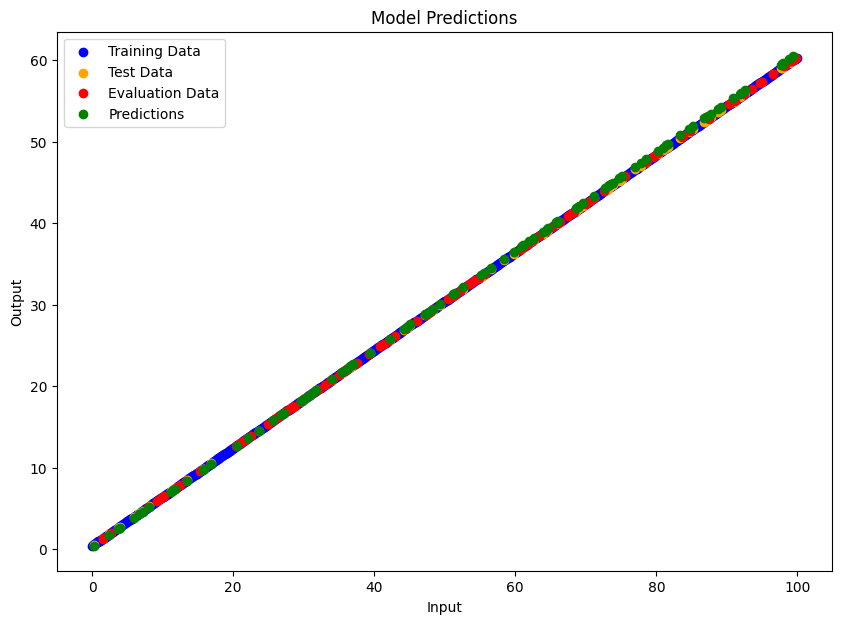

In [104]:
# Training the model using the training loop

model = LinearRegressionModel()

loss_fn = nn.L1Loss()  # Mean Absolute Error (MAE)
# Experiment with nn.MSELoss()

optimizer = optim.SGD(params=model.parameters(), lr=0.0001)  # lr -> Learning rate -> Hyper-parameter
# Experiment with optim.ADAM()

torch.manual_seed(42)

epochs = 75  # A kind of a Hyper-parameter

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    #print(f"Epoch {epoch+1}:")
    # Train the model
    model.train()

    # Forward pass (perform predictions based on current weight and bias)
    y_pred = model(X_train)

    # Calculate the loss
    loss = loss_fn(y_pred, y_train)
    #print(f"    Loss: {loss}")

    # Zero grad the optimizer
    optimizer.zero_grad()

    # Loss backwards (backwards pass)
    loss.backward()

    # Progress the optimizer -> updates the weight and bias - based on the loss gradients
    optimizer.step()

    # Evaluate the model
    model.eval()

    # Test the model
    with torch.inference_mode():
        test_pred = model(X_test)

        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

plot_predictions(X_train, y_train, X_test, y_test, predictions=test_pred)
plt.show()

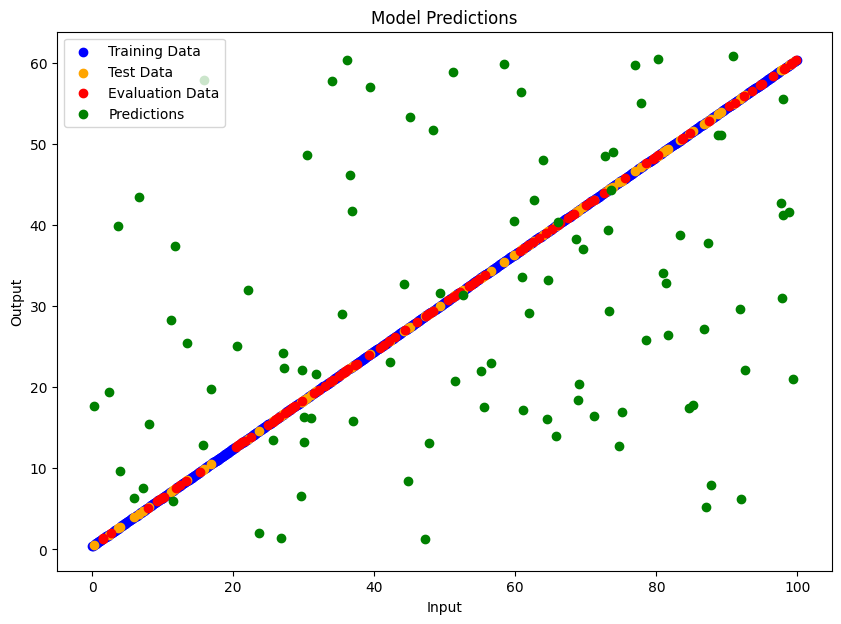